# Đọc, ghi, hiển thị ảnh
    
Đoạn mã bên dưới minh hoạ việc đọc ảnh và hiển thị ảnh.

Để đọc ảnh với đầu vào là URL - dùng thư viện skimage vì opencv không hỗ trợ.

Lưu ý quan trọng - 3 kênh màu R, G, B khi dùng với opencv thì thứ tự là BGR; 
trong khi với các thư viện còn lại thì thứ tự là RGB.

Do đó, nếu trong bộ nhớ, dữ liệu lưu dưới dạng BGR thì nếu dùng hàm không phải của opencv thì phải đổi lại.

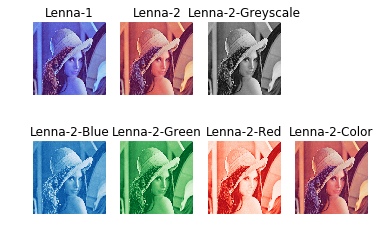

In [21]:
#written by B2DL

import cv2
import numpy as np
from skimage import  io
import matplotlib.pyplot as plt

# đọc ảnh từ URL - dùng skimage (opencv không hỗ trợ)
url = 'https://upload.wikimedia.org/wikipedia/en/2/24/Lenna.png'
img = io.imread(url)

# lưu ảnh xuống file - theo định dạng jpg

 # img trả về từ skimage lưu dưới dạng RGB
cv2.imwrite('Lenna-1.jpg', img);

# phải chuyển sang dạng BGR khi dùng với cv2.imwrite
cv2.imwrite('Lenna-2.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

# đọc ảnh từ file
img = cv2.imread('Lenna-1.jpg')

# hiển thị ảnh - imshow chỉ dùng khi chạy ở terminal, không dùng khi chạy với Jupyter Notebook
#cv2.imshow('image', img)
#cv2.waitKey(0) # chờ đến khi có phím nhấn
#cv2.destroyAllWindows()

# hiển thị ảnh - dùng matplotlib - ảnh lưu dạng RGB
plt.subplot(241)
plt.axis('off')
plt.title('Lenna-1')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# đọc ảnh từ file
img = cv2.imread('Lenna-2.jpg')

# hiển thị ảnh - dùng matplotlib
plt.subplot(242)
plt.axis('off')
plt.title('Lenna-2')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# đọc ảnh từ file - chuyển về greyscale
gray_img = cv2.imread('Lenna-2.jpg', cv2.IMREAD_GRAYSCALE)

# hiển thị ảnh - dùng matplotlib
plt.subplot(243)
plt.axis('off')
plt.title('Lenna-2-Greyscale')
plt.imshow(gray_img, cmap = plt.get_cmap('gray'))

b_img, g_img, r_img = cv2.split(img)

plt.subplot(245)
plt.axis('off')
plt.title('Lenna-2-Blue')
plt.imshow(b_img, plt.cm.Blues_r)

plt.subplot(246)
plt.axis('off')
plt.title('Lenna-2-Green')
plt.imshow(g_img, plt.cm.Greens_r)

plt.subplot(247)
plt.axis('off')
plt.title('Lenna-2-Red')
plt.imshow(r_img, plt.cm.Reds_r)

plt.subplot(248)
image = cv2.merge((b_img,g_img,r_img))
plt.axis('off')
plt.title('Lenna-2-Color')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()


# Đọc và hiển thị dữ liệu video từ camera

Đoạn mã dưới đây sẽ đọc dữ liệu từ video được stream từ IP camera. 

Lưu ý, đoạn mã chỉ chạy khi dùng console ($python asc-lect2), không dùng với Jupyter Notebook

In [ ]:
#written by B2DL

import cv2

# dữ liệu camera giao thông của Đà Nẵng - http://camera.0511.vn/
camera_url = 'http://4co2.vp9.tv/chn/DNG8/v.m3u8'

# dữ liệu camera công cộng - đường Nguyễn Huệ Tp. HCM
camera_url = 'http://113.161.67.249:8083/mjpg/video.mjpg'

# dữ liệu output.avi
#camera_url = 'output.avi' # filename

# dữ liệu từ webcam
camera_url = 0 #deviceId

cap = cv2.VideoCapture(camera_url)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Do something
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame 
    # Press q to quit
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# Ghi dữ liệu video ra tập tin

Đoạn mã bên dưới đọc dữ liệu từ IP camera, hiển thị và đồng thời lưu xuống thành file output.avi sử dụng codec XVID.

Lưu ý, đoạn mã chỉ chạy khi dùng console ($python asc-lect2), không dùng với Jupyter Notebook

Và nhớ nhấn phím q để kết thúc việc hiển thị và ghi.

In [ ]:
# dữ liệu camera giao thông của Đà Nẵng - http://camera.0511.vn/
camera_url = 'http://4co2.vp9.tv/chn/DNG8/v.m3u8'
cap = cv2.VideoCapture(camera_url)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 30.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        
        # Write the frame to output file
        out.write(frame)

        cv2.imshow('frame', frame)
        
        # Press q to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# Thao tác trên dữ liệu ảnh trong bộ nhớ dùng NumPy



(512, 512, 3)
uint8
786432
[ 80  67 177]
80


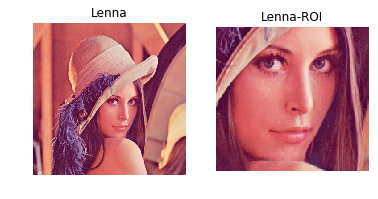

In [37]:
#written by B2DL

import cv2
import numpy as np
from skimage import  io

# đọc ảnh từ URL - dùng skimage (opencv không hỗ trợ)
url = 'https://upload.wikimedia.org/wikipedia/en/2/24/Lenna.png'
img = io.imread(url)

# lưu ảnh xuống file - theo định dạng jpg
# phải chuyển sang dạng BGR khi dùng với cv2.imwrite
cv2.imwrite('Lenna.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

# đọc ảnh từ file
img = cv2.imread('Lenna.jpg')

#print(img)

# kích thước width x height x #channels
print(img.shape)
width=img.shape[0]
height=img.shape[1]

# dữ liệu cho mỗi pixel
print(img.dtype)

# kích thước
print(img.size)

# truy xuất giá trị của một pixel
px = img[int(width/2), int(height/2)]
print(px)

# truy xuất giá trị của một pixel trên kênh blue
blue = img[int(width/2), int(height/2), 0]
print(blue)

# getROI
plt.subplot(122)
roi = img[220:400, 200:390]
plt.axis('off')
plt.title('Lenna-ROI')
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

plt.subplot(121)
plt.axis('off')
plt.title('Lenna')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()
